Using basic libraries for calculation, data and modeling.

In [1]:
import numpy as np
import pandas as pd

Check current folder, get updated files if available.

In [2]:
!pwd
#!wget -N https://gitlab.com/dzwietering/corona/-/raw/master/zzprogress.csv
#!wget -N https://www.acaps.org/sites/acaps/files/resources/files/acaps_covid19_government_measures_dataset_0.xlsx

/home/zwieteri/git/corona/experiment


Read the generated country progress file, read the proper columns as dates.

In [3]:
df_prog = pd.read_csv('zzprogress.csv', parse_dates=[8, 9, 10])
df_prog

iso2                         cname iso3    ccont     popdata  rsquared  \
0     AD                       Andorra  AND   Europe     76177.0  0.405009   
1     AE          United_Arab_Emirates  ARE     Asia   9770526.0  0.970967   
2     AF                   Afghanistan  AFG     Asia  38041757.0  0.776529   
3     AL                       Albania  ALB   Europe   2862427.0  0.277279   
4     AM                       Armenia  ARM   Europe   2957728.0  0.366437   
..   ...                           ...  ...      ...         ...       ...   
171   VG        British_Virgin_Islands  VGB  America     30033.0  0.714111   
172   VI  United_States_Virgin_Islands  VIR  America    104579.0  0.190846   
173   XK                        Kosovo  XKX   Europe   1798506.0  0.230500   
174   ZM                        Zambia  ZMB   Africa  17861034.0  0.734048   
175   ZW                      Zimbabwe  ZWE   Africa  14645473.0  0.842622   

     progress         final      start       peak      floor        beta  \
0    0.292502  2.922351e+03 2020-01-24 2020-05-11 2021-04-09   50.031088   
1    0.810311  6.055558e+04 2020-03-16 2020-05-18 2020-11-02   31.885092   
2    0.504971  6.303103e+04 2020-04-10 2020-06-23 2020-11-30   44.580351   
3    0.364515  7.013855e+03 2020-03-03 2020-07-06 2021-03-28   76.985748   
4    0.014079  1.346352e+06 2020-02-26 2021-01-23        NaT  139.939784   
..        ...           ...        ...        ...        ...         ...   
171  0.772823  1.035167e+01 2020-04-02 2020-05-03 2020-07-02   22.194892   
172  0.471879  1.930876e+02 2020-02-15 2020-06-19 2021-02-25   81.204192   
173  0.311508  9.533610e+03 2020-03-04 2020-07-12 2021-05-17   71.938088   
174  0.725965  2.248044e+03 2020-05-04 2020-05-27 2020-06-30   23.463639   
175  0.476120  1.270688e+03 2020-06-06 2020-06-21 2020-07-12   24.190340   

             mu        maxcur  
0    132.358777    299.932303  
1    139.117348   9703.833759  
2    174.835763   7253.463321  
3    187.528946    472.859199  
4    389.394607  68107.927888  
..          ...           ...  
171  123.874857      2.363026  
172  170.570827     12.350277  
173  193.718789    686.334812  
174  147.600605    486.197564  
175  173.342768    266.832295  

[176 rows x 14 columns]

Have a look at the countries with the highest estimated part of the population concurrently infected. Therefore, we divide the maximum current from the estimate by the population data. We use a log scale due to large differences and show countries with values above 1 per thousand.

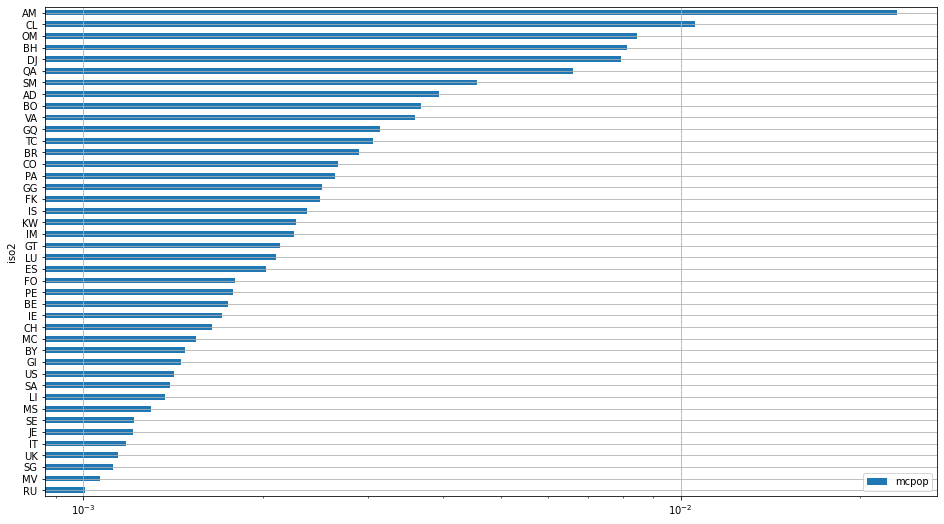

In [4]:
df_prog['mcpop'] = df_prog['maxcur'] / df_prog['popdata']
df_prog[df_prog['mcpop'] > 1/1000].sort_values(by=['mcpop']).plot(
    x='iso2', y='mcpop', kind='barh', logx=True, figsize=(16, 9), grid=True)

The log of infected seems a good initial measure, so we define it as target.

In [5]:
df_prog['target'] = np.log10(df_prog['mcpop'])
df_prog['target'].describe()

count    176.000000
mean      -3.529878
std        0.684149
min       -4.807437
25%       -4.104853
50%       -3.541673
75%       -3.013171
max       -1.637761
Name: target, dtype: float64

For looking at country behavior we try the ACAPS government measures dataset.

In [6]:
df_meas = pd.read_excel('acaps_covid19_government_measures_dataset_0.xlsx', sheet_name='Database')
df_meas

ID      COUNTRY  ISO ADMIN_LEVEL_NAME  PCODE  REGION  \
0          1  Afghanistan  AFG              NaN    NaN    Asia   
1          2  Afghanistan  AFG            Kabul    NaN    Asia   
2          3  Afghanistan  AFG              NaN    NaN    Asia   
3          4  Afghanistan  AFG              NaN    NaN    Asia   
4          5  Afghanistan  AFG              NaN    NaN    Asia   
...      ...          ...  ...              ...    ...     ...   
14094  11774     Zimbabwe  ZWE              NaN    NaN  Africa   
14095  11775     Zimbabwe  ZWE              NaN    NaN  Africa   
14096  13722     Zimbabwe  ZWE              NaN    NaN  Africa   
14097  13723     Zimbabwe  ZWE              NaN    NaN  Africa   
14098  13724     Zimbabwe  ZWE              NaN    NaN  Africa   

                                   LOG_TYPE  \
0      Introduction / extension of measures   
1      Introduction / extension of measures   
2      Introduction / extension of measures   
3      Introduction / extension of measures   
4      Introduction / extension of measures   
...                                     ...   
14094                     Phase-out measure   
14095                     Phase-out measure   
14096  Introduction / extension of measures   
14097                     Phase-out measure   
14098  Introduction / extension of measures   

                                     CATEGORY  \
0                      Public health measures   
1                      Public health measures   
2                      Public health measures   
3      Governance and socio-economic measures   
4                           Social distancing   
...                                       ...   
14094                       Social distancing   
14095                       Social distancing   
14096                   Movement restrictions   
14097                       Social distancing   
14098                   Movement restrictions   

                                                 MEASURE TARGETED_POP_GROUP  \
0      Health screenings in airports and border cross...                 No   
1                      Isolation and quarantine policies                 No   
2                                    Awareness campaigns                 No   
3      Emergency administrative structures activated ...                 No   
4                                Limit public gatherings                 No   
...                                                  ...                ...   
14094                            Limit public gatherings                 No   
14095                            Limit public gatherings                 No   
14096                        Surveillance and monitoring                 No   
14097                                   Schools closure                  No   
14098                        Surveillance and monitoring                Yes   

                                                COMMENTS  NON_COMPLIANCE  \
0                                                    NaN             NaN   
1                                                    NaN             NaN   
2                                                    NaN             NaN   
3                                                    NaN             NaN   
4                              Nevruz festival cancelled             NaN   
...                                                  ...             ...   
14094  Outdoor exercises like walking or jogging or c...  Not applicable   
14095  Athletes taking part in low-risk sports, inclu...  Not applicable   
14096  Everyone transiting through Zimbabwe should ha...   Not available   
14097  the re-opening of schools be moved from the pr...  Not applicable   
14098  Identification/travel documents of returness w...   Not available   

      DATE_IMPLEMENTED                   SOURCE   SOURCE_TYPE  \
0           2020-02-12       Ministry of Health    Government   
1           2020-02-12       Ministry of Health    Government   
2     

The dataset contains both start and end of measures, so let's see how they are coded.

In [7]:
print(df_meas['LOG_TYPE'].unique())
df_meas = df_meas[df_meas['LOG_TYPE'] == 'Introduction / extension of measures']

['Introduction / extension of measures' 'Phase-out measure']


Both datasets contain the three character ISO country code, so we join on those columns.

In [8]:
df_full = pd.merge(df_prog, df_meas, left_on='iso3', right_on='ISO')
df_full

iso2                 cname iso3   ccont     popdata  rsquared  progress  \
0      AE  United_Arab_Emirates  ARE    Asia   9770526.0  0.970967  0.810311   
1      AE  United_Arab_Emirates  ARE    Asia   9770526.0  0.970967  0.810311   
2      AE  United_Arab_Emirates  ARE    Asia   9770526.0  0.970967  0.810311   
3      AE  United_Arab_Emirates  ARE    Asia   9770526.0  0.970967  0.810311   
4      AE  United_Arab_Emirates  ARE    Asia   9770526.0  0.970967  0.810311   
...   ...                   ...  ...     ...         ...       ...       ...   
9610   ZW              Zimbabwe  ZWE  Africa  14645473.0  0.842622  0.476120   
9611   ZW              Zimbabwe  ZWE  Africa  14645473.0  0.842622  0.476120   
9612   ZW              Zimbabwe  ZWE  Africa  14645473.0  0.842622  0.476120   
9613   ZW              Zimbabwe  ZWE  Africa  14645473.0  0.842622  0.476120   
9614   ZW              Zimbabwe  ZWE  Africa  14645473.0  0.842622  0.476120   

             final      start       peak  ...  \
0     60555.581651 2020-03-16 2020-05-18  ...   
1     60555.581651 2020-03-16 2020-05-18  ...   
2     60555.581651 2020-03-16 2020-05-18  ...   
3     60555.581651 2020-03-16 2020-05-18  ...   
4     60555.581651 2020-03-16 2020-05-18  ...   
...            ...        ...        ...  ...   
9610   1270.687623 2020-06-06 2020-06-21  ...   
9611   1270.687623 2020-06-06 2020-06-21  ...   
9612   1270.687623 2020-06-06 2020-06-21  ...   
9613   1270.687623 2020-06-06 2020-06-21  ...   
9614   1270.687623 2020-06-06 2020-06-21  ...   

                                                MEASURE  TARGETED_POP_GROUP  \
0                                     Visa restrictions                 Yes   
1                                     Visa restrictions                  No   
2                      International flights suspension                 Yes   
3     Health screenings in airports and border cross...                 Yes   
4     Health screenings in airports and border cross...                  No   
...                                                 ...                 ...   
9610                                   Partial lockdown                  No   
9611      Requirement to wear protective gear in public                  No   
9612                                   Partial lockdown                  No   
9613                        Surveillance and monitoring                  No   
9614                        Surveillance and monitoring                 Yes   

                                               COMMENTS    NON_COMPLIANCE  \
0     entry ban for travellers from Iran (no governm...               NaN   
1         suspension of visa issuance starting March 17               NaN   
2     flights to and from Iran and China are suspend...               NaN   
3     passengers arriving from China will undergo he...               NaN   
4          health sreenings for all passengers arriving               NaN   
...                                                 ...               ...   
9610  Partial lockdown (level 2) extended indefinite...     Not available   
9611  The government of Zimbabwe has officially made...  Arrest/Detention   
9612           Zimbabwe extends lockdown until May 15th     Not available   
9613  Everyone transiting through Zimbabwe should ha...     Not available   
9614  Identification/travel documents of returness w...     Not available   

      DATE_IMPLEMENTED                       SOURCE   SOURCE_TYPE  \
0           2020-01-02                      Reuters         Media   
1           2020-03-17                          NYT         Media   
2           2020-03-17  Ministry of Foreign Affairs    Government   
3           2020-01-23                 KhaleejTimes         Media   
4           2020-03-08                   US Embassy    Government   
...                ...                          ...           ...   
9610        2020-05-17          Zimbabwe Government    Government   
9611        2020-05-04       

The first analysis could be how early measures were implemented, so we calculate the difference between the implemented date and our estimated start date in days.

In [9]:
df_full['days'] = (df_full['DATE_IMPLEMENTED'] - df_full['start']).dt.days
df_full['days'].describe()

count    9378.000000
mean       21.149499
std        40.613122
min      -153.000000
25%        -4.000000
50%        21.000000
75%        49.000000
max       223.000000
Name: days, dtype: float64

To reduce this to a source dataset for modeling, we filter on introduction of measures and pivot to columns with the average number of days for categories, indexed by country code.

In [10]:
df_aggr = df_full.pivot_table(index='iso2', columns='CATEGORY', values='days')
df_aggr

CATEGORY  Governance and socio-economic measures  Humanitarian exemption  \
iso2                                                                       
AE                                      8.000000                     NaN   
AF                                    -45.800000                     NaN   
AL                                     20.733333                     NaN   
AM                                     66.333333                     NaN   
AT                                     33.925000                     NaN   
...                                          ...                     ...   
UZ                                           NaN                     NaN   
VC                                           NaN                     NaN   
VE                                    -24.900000                     NaN   
ZM                                    -30.000000                     NaN   
ZW                                    -52.200000                     NaN   

CATEGORY  Lockdown  Movement restrictions  Public health measures  \
iso2                                                                
AE            20.5              28.625000               11.545455   
AF           -13.0             -45.375000              -39.343750   
AL            35.5              20.833333               -1.272727   
AM            38.0              29.714286               31.000000   
AT            17.0              12.363636               44.868421   
...            ...                    ...                     ...   
UZ             NaN             -16.000000                     NaN   
VC             NaN                    NaN               14.777778   
VE           -44.0             -22.250000              -26.600000   
ZM             NaN             -25.166667              -36.636364   
ZW           -42.0             -22.666667              -67.000000   

CATEGORY  Social distancing  
iso2                         
AE                23.500000  
AF               -27.333333  
AL                14.125000  
AM                23.750000  
AT                23.846154  
...                     ...  
UZ                      NaN  
VC                 9.000000  
VE               -45.666667  
ZM               -42.833333  
ZW               -66.400000  

[150 rows x 6 columns]

The final dataset contains this data combined with our estimates.

In [11]:
df_final = pd.merge(df_prog, df_aggr, left_on='iso2', right_index=True)
df_final.reset_index(drop=True, inplace=True)
df_final

iso2                             cname iso3    ccont     popdata  \
0     AE              United_Arab_Emirates  ARE     Asia   9770526.0   
1     AF                       Afghanistan  AFG     Asia  38041757.0   
2     AL                           Albania  ALB   Europe   2862427.0   
3     AM                           Armenia  ARM   Europe   2957728.0   
4     AT                           Austria  AUT   Europe   8858775.0   
..   ...                               ...  ...      ...         ...   
145   UZ                        Uzbekistan  UZB     Asia  32981715.0   
146   VC  Saint_Vincent_and_the_Grenadines  VCT  America    110593.0   
147   VE                         Venezuela  VEN  America  28515829.0   
148   ZM                            Zambia  ZMB   Africa  17861034.0   
149   ZW                          Zimbabwe  ZWE   Africa  14645473.0   

     rsquared  progress         final      start       peak  ...          mu  \
0    0.970967  0.810311  6.055558e+04 2020-03-16 2020-05-18  ...  139.117348   
1    0.776529  0.504971  6.303103e+04 2020-04-10 2020-06-23  ...  174.835763   
2    0.277279  0.364515  7.013855e+03 2020-03-03 2020-07-06  ...  187.528946   
3    0.366437  0.014079  1.346352e+06 2020-02-26 2021-01-23  ...  389.394607   
4    0.990413  1.134533  1.570162e+04 2020-03-13 2020-03-29  ...   88.659540   
..        ...       ...           ...        ...        ...  ...         ...   
145  0.142329  0.112522  7.243761e+04 2020-04-10 2020-09-30  ...  273.628670   
146  0.187888  0.337449  8.578691e+01 2020-03-09 2020-06-01  ...  153.016081   
147  0.337855  0.071044  8.430249e+04 2020-05-15 2020-09-07  ...  250.670155   
148  0.734048  0.725965  2.248044e+03 2020-05-04 2020-05-27  ...  147.600605   
149  0.842622  0.476120  1.270688e+03 2020-06-06 2020-06-21  ...  173.342768   

           maxcur     mcpop    target  Governance and socio-economic measures  \
0     9703.833759  0.000993 -3.002975                                8.000000   
1     7253.463321  0.000191 -3.719715                              -45.800000   
2      472.859199  0.000165 -3.782003                               20.733333   
3    68107.927888  0.023027 -1.637761                               66.333333   
4     8765.056332  0.000989 -3.004619                               33.925000   
..            ...       ...       ...                                     ...   
145   3582.122755  0.000109 -3.964133                                     NaN   
146      7.064379  0.000064 -4.194654                                     NaN   
147   6482.019450  0.000227 -3.643376                              -24.900000   
148    486.197564  0.000027 -4.565094                              -30.000000   
149    266.832295  0.000018 -4.739465                              -52.200000   

     Humanitarian exemption  Lockdown  Movement restrictions  \
0                       NaN      20.5              28.625000   
1                       NaN     -13.0             -45.375000   
2                       NaN      35.5              20.833333   
3                       NaN      38.0              29.714286   
4                       NaN      17.0              12.363636   
..                      ...       ...                    ...   
145                     NaN       NaN             -16.000000   
146                     NaN       NaN                    NaN   
147                     NaN     -44.0             -22.250000   
148                     NaN       NaN             -25.166667   
149                     NaN     -42.0             -22.666667   

     Public health measures  Social distancing  
0                 11.545455          23.500000  
1                -39.343750         -27.333333  
2                 -1.272727          14.125000  
3                 31.000000          23.750000  
4                 44.868421          23.846154  
..                      ...                ...  
145                     NaN                NaN  
146               14.777778           9.0000

Just a quick check on data, for example the relation between beta (the Gumbel curve width parameter) and the target column.

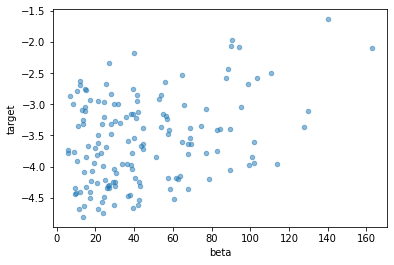

In [12]:
df_final.plot(kind="scatter", x="beta", y="target", alpha=1/2)

If we start using this model for predictions, we need to split the dataset. For now we are still exploring so we use all the data for analysis. The feature columns are all the columns added to the right of our dataset with estimations.

In [13]:
from sklearn.model_selection import train_test_split

featcols = len(df_prog.columns)
features = df_final.columns[featcols:]

#x_trn, x_tst, y_trn, y_tst = train_test_split(df_final[features], df_final['mcpop'])

x_trn = df_final[features]
y_trn = df_final['target']

Create the XGBoost data structure for training and check parameters to prevent overfitting on this small dataset. Then check the error rate between the test and train data used internally by XGBoost. If the test error rate is much higher, we are overfitting.

In [14]:
import xgboost as xgb

dtrn = xgb.DMatrix(x_trn, label=y_trn)
#dtst = xgb.DMatrix(x_tst)

params = {
    #'objective':'reg:squarederror',
    'eta':1/10,
    'gamma':5,
    #'min_child_weight':10,
    #'tree_method':'hist',
    #'seed':0,
    #'max_depth':3,
    'colsample_bytree':0.7,
    'subsample':0.7,
}

hist = xgb.cv(params, dtrn, nfold=10, as_pandas=True, num_boost_round=100, verbose_eval=10, early_stopping_rounds=1000, show_stdv=True, seed=0)
hist.plot(y=["test-rmse-mean", "train-rmse-mean"])

[0]	train-rmse:3.74321+0.01755	test-rmse:3.73885+0.18439
[10]	train-rmse:1.45334+0.00521	test-rmse:1.45008+0.15862
[20]	train-rmse:0.75475+0.00881	test-rmse:0.77148+0.11644
[30]	train-rmse:0.61094+0.00963	test-rmse:0.63675+0.09730
[40]	train-rmse:0.58763+0.00869	test-rmse:0.61616+0.09466
[50]	train-rmse:0.58357+0.00988	test-rmse:0.61387+0.09550
[60]	train-rmse:0.58328+0.00984	test-rmse:0.61298+0.09570
[70]	train-rmse:0.58164+0.00881	test-rmse:0.61402+0.09623
[80]	train-rmse:0.58161+0.00882	test-rmse:0.61444+0.09605
[90]	train-rmse:0.58164+0.00884	test-rmse:0.61452+0.09584
[99]	train-rmse:0.58048+0.00919	test-rmse:0.61252+0.09530


Train the model using the parameters found above and show the feature importance. Note that this can be both a positive and negative influence.

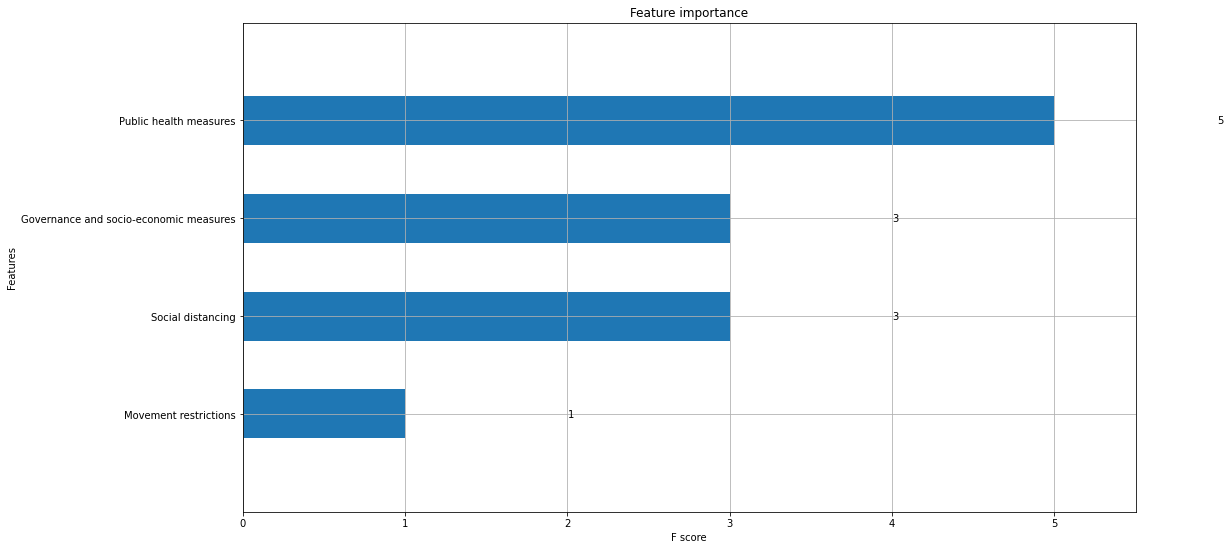

In [15]:
bst = xgb.train(params, dtrn, num_boost_round=100, verbose_eval=1)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 9))

xgb.plot_importance(bst, ax=ax, height=1/2)

The actual XGBoost model is an ensemble of decision trees that can be hard to interpret. SHAP is an analysis library that shows the influence of factors based on this model. First we choose a country and see how the estimate relates to measures.

In [23]:
country = 'US'

rownum = df_final[df_final['iso2'] == country].index[0]

import shap

shap.initjs()

explainer = shap.TreeExplainer(bst, x_trn)
shap_values = explainer.shap_values(x_trn)

shap.force_plot(explainer.expected_value, shap_values[rownum], x_trn.loc[rownum])

When we take all these plots, rotate and stack them we get a global view of the model.

In [17]:
shap.force_plot(explainer.expected_value, shap_values, x_trn)

Looking at individual measures we can visualize their impact on model output.

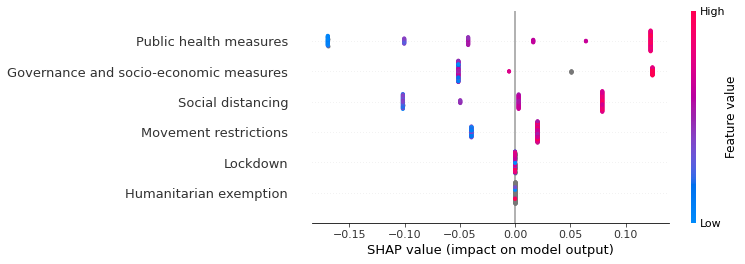

In [18]:
shap.summary_plot(shap_values, x_trn)

Finally, a similar plot to the importance plot above shows the explanatory value of measures.

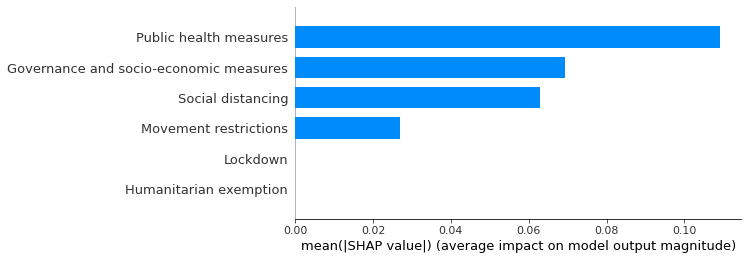

In [19]:
shap.summary_plot(shap_values, x_trn, plot_type="bar")

Keep exploring! Stay home, wash your hands, keep your distance.